### assignment 18
### kartik thakur

### Predict the survival of passenger from given dataset using Logistic Regression

In [113]:
# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing two files train and test of titanic passangers 

In [3]:
titanic=pd.read_csv('titanic_test.csv')

In [4]:
# showing the head of titanic dataset

In [5]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# changing the name of titanic column name

In [7]:
titanic=titanic.rename(columns={'PassengerId': 'Passenger id'})

In [8]:
# checking the info of titanic , all columns have correct dtype / 891 entries in total

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger id  418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           332 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          417 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# cleaning the data 

In [11]:
# first checking the null values 

In [12]:
titanic.isnull().sum()

Passenger id      0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
dtype: int64

In [13]:
# we can create a heat map 

<AxesSubplot:>

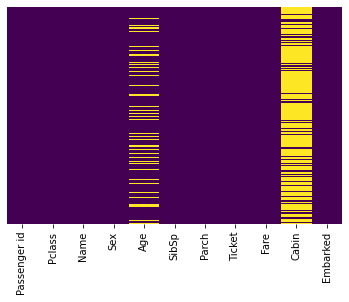

In [14]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
# sns.set_style('whitegrid')
# sns.countplot(data=titanic,x='Survived',hue='Sex')

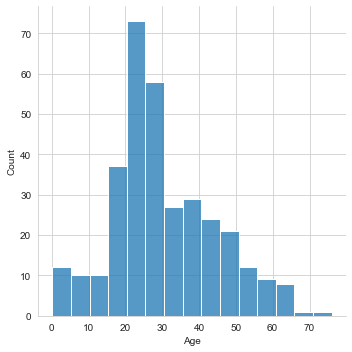

In [22]:
sns.displot(data=titanic,x='Age') # displying which age group was most common in the ship

<AxesSubplot:xlabel='SibSp', ylabel='count'>

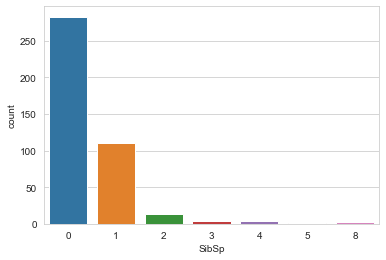

In [23]:
sns.countplot(x='SibSp',data=titanic)  # how many people are travelling alone, with 2 or 3 so on

<AxesSubplot:>

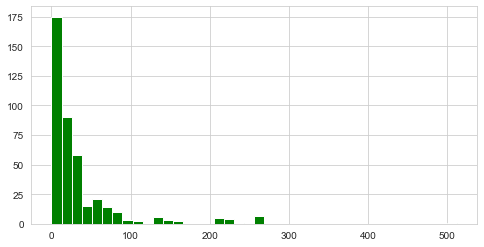

In [24]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

## DATA CLEANING 

Fill the missing age data , insted of droping the data.
there are many missing are rows using some mean and other methods

In [25]:
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 24
        else:
            return Age

In [26]:
titanic['Age']=titanic[['Age',"Pclass"]].apply(add_age,axis=1)

In [27]:
titanic.isnull().sum()

Passenger id      0
Pclass            0
Name              0
Age             332
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
dtype: int64

<AxesSubplot:>

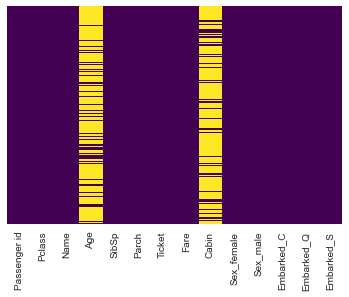

In [28]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger id  418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Age           86 non-null     float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Ticket        418 non-null    object 
 7   Fare          417 non-null    float64
 8   Cabin         91 non-null     object 
 9   Sex_female    418 non-null    uint8  
 10  Sex_male      418 non-null    uint8  
 11  Embarked_C    418 non-null    uint8  
 12  Embarked_Q    418 non-null    uint8  
 13  Embarked_S    418 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 31.6+ KB


In [30]:
titanic=pd.get_dummies(titanic,columns=['Sex',"Embarked"])

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [ ]:
titanic.head()